# CS M148 Project Check-In 2: Evaluation and Regularization

## **Steps 1 and 2: Choose predictor and response variables to model regression**
We have chosen our response variable to be Exam_Score.

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

In [ ]:
import kagglehub
# Get the path to the CSV file
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
path = path + '/StudentPerformanceFactors.csv'
# Read the CSV file
student_performance_factors_original = pd.read_csv(path)
student_performance_factors_original

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
# Linear regression
# Predictors: study hours, attendance
# Response: test score

attendance = student_performance_factors_original["Attendance"]
test_score = student_performance_factors_original["Exam_Score"]

# Split data and train model
lr = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(attendance, test_score, test_size=0.2, random_state=42)
X_train, X_test = X_train.to_frame(), X_test.to_frame()
model = lr.fit(X_train, Y_train)

R2 on test data: 0.34761575791181265
R2 on train data: 0.3352410893896265


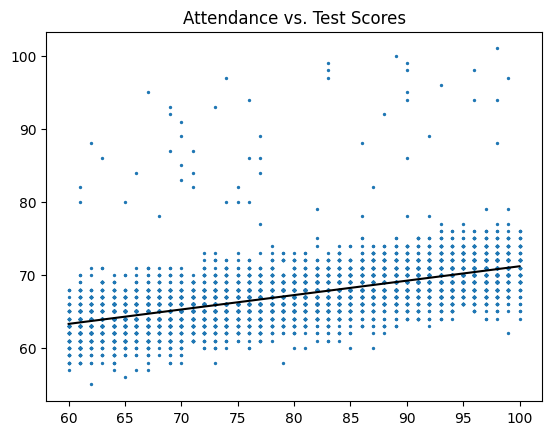

In [ ]:
# R2 Scores
print("R2 on test data:", lr.score(X_test,Y_test))
print("R2 on train data:", lr.score(X_train,Y_train))

#Scatterplots
plt.scatter(attendance, test_score, s=2)
plt.title("Attendance vs. Test Scores")
x = np.linspace(60,100,100)
y = lr.coef_[0] * x + lr.intercept_
plt.plot(x,y, color='black')
plt.show()

R-squared for the test and train sets aren't very high, so let's try to do variable selection and use more predictor variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# drop rows with missing values (we go over this more in-depth in check-in 4, but I am copying the code here because it is necessary for our categorical
# variable encodings to work)
miss_cat_cols = ["Teacher_Quality","Parental_Education_Level","Distance_from_Home"]
student_performance_factors_original = student_performance_factors_original.dropna(subset=miss_cat_cols)

# encode categorical variables (convert them to numeric):
Ordinal_cols = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Distance_from_Home", "Peer_Influence", "Parental_Education_Level"]
ord_enc = OrdinalEncoder(categories=[
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"],
    ["Near", "Moderate", "Far"],
    ["Negative", "Neutral", "Positive"],
    ["High School", "College", "Postgraduate"]
])

student_performance_factors_original[Ordinal_cols] = ord_enc.fit_transform(student_performance_factors_original[Ordinal_cols])

binary_cols = ["Extracurricular_Activities","Internet_Access","Learning_Disabilities","Gender","School_Type"]

for col in binary_cols:
    le = LabelEncoder()
    student_performance_factors_original[col] = le.fit_transform(student_performance_factors_original[col])

### **Variable (forward) Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# get training and testing data
X = student_performance_factors_original.drop('Exam_Score', axis = 1)
y = student_performance_factors_original['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# using linear regression as our model
lr = LinearRegression()

# implement step forward feature selector
selector = SequentialFeatureSelector(
    lr,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

In [ ]:
# print out which columns were chosen as the optimal features
selector.get_support()

array([ True,  True,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False, False,  True, False,
       False])

In [ ]:
# output the names of the columns of our optimal features
selected_features = X_train.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions',
       'Family_Income', 'Peer_Influence', 'Parental_Education_Level'],
      dtype='object')


Before moving on, we notice that these are too many predictor variables that have been chosen to be our optimal features and could lead to overfitting. Therefore, we can choose the predictor variables from the correlation matrix we found from the first project check-in and check which ones have more correlation with Exam_Scores.

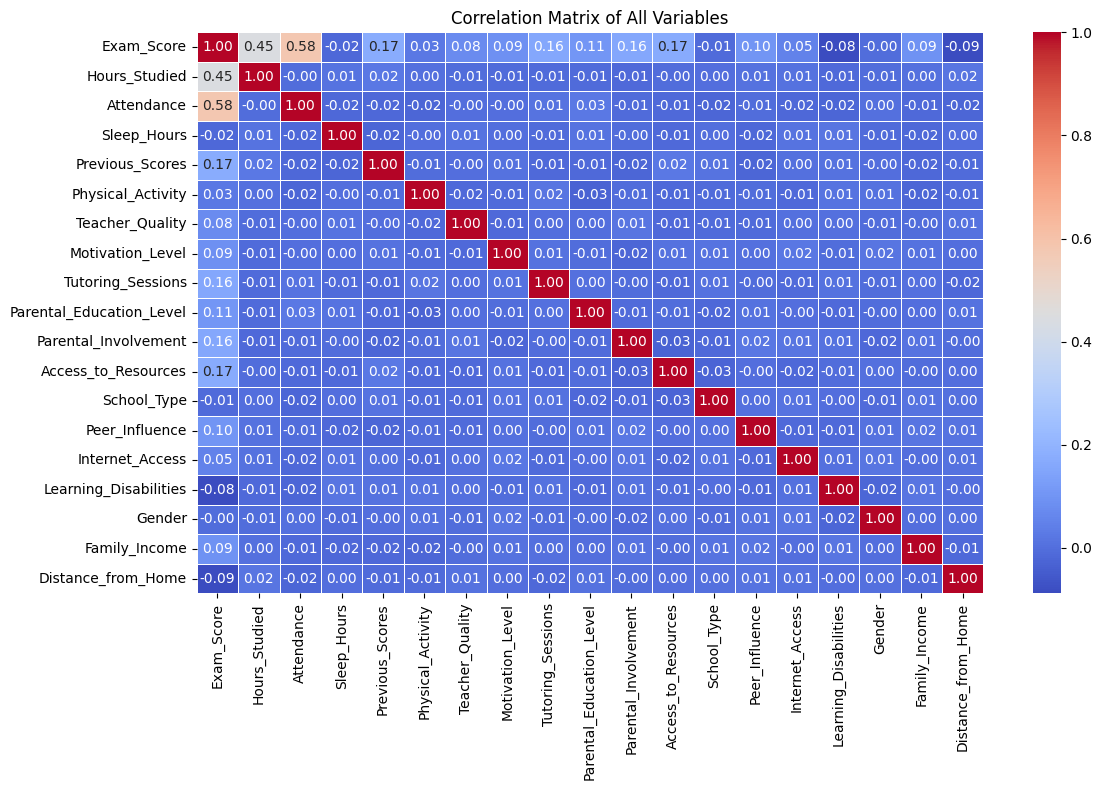

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# redid the correlation matrix plot from project check-in 1 since it wasn't showing in the PDF

# Get all variables for the correlation matrix including Exam_Score
corr_vars = student_performance_factors_original[['Exam_Score', 'Hours_Studied', 'Attendance', 'Sleep_Hours',
                       'Previous_Scores', 'Physical_Activity', 'Teacher_Quality', 'Motivation_Level',
                       'Tutoring_Sessions', 'Parental_Education_Level', 'Parental_Involvement',
                       'Access_to_Resources', 'School_Type', 'Peer_Influence', 'Internet_Access',
                       'Learning_Disabilities', 'Gender', 'Family_Income', 'Distance_from_Home']]

# Generate the correlation matrix
corr_matrix = corr_vars.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Matrix of All Variables')
plt.tight_layout()
plt.show()

We notice that Hours_Studied and Attendance have the most correlation with Exam_Score, so we will be using these as our predictor variables.

However, we will also check if adding two more predictor variables, Previous_Scores and Tutoring_Sessions (3rd and 4th variables that have the most correlation with Exam_Score) shows any different when looking at the R-squared. Main reason for this is due to potential underfitting with just two predictors. Additionally, we see that these predictor variables are also in the selected optimal features.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

selected_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']
X = student_performance_factors_original[selected_features]
y = student_performance_factors_original['Exam_Score']

# don't need to encode since we do not have categorical variables in our selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# using linear regression as our model
lr = LinearRegression()


# implement step forward feature selector
selector = SequentialFeatureSelector(
    lr,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train,y_train)

# Use  selected features for the regression model
selected_features_new = selector.get_support()

# using .loc to access and modify data in the data fram using the column names
X_train_selected = X_train.loc[:, selected_features_new]
X_test_selected = X_test.loc[:, selected_features_new]


# Train LR model
lr.fit(X_train_selected, y_train)

# Predictions
y_train_pred = lr.predict(X_train_selected)
y_test_pred = lr.predict(X_test_selected)

# Calculate R-squared and MSE for both training and test
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training R-squared: 0.5482622060126416
Test R-squared: 0.4971086803549305
Training MSE: 6.79450462363454
Test MSE: 8.255098754707348


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

selected_features = ['Hours_Studied', 'Attendance']
X = student_performance_factors_original[selected_features]
y = student_performance_factors_original['Exam_Score']

# don't need to encode since we do not have categorical variables in our selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# using linear regression as our model
lr = LinearRegression()


# implement step forward feature selector
selector = SequentialFeatureSelector(
    lr,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train,y_train)

# Use  selected features for the regression model
selected_features_new = selector.get_support()

# using .loc to access and modify data in the data fram using the column names
X_train_selected = X_train.loc[:, selected_features_new]
X_test_selected = X_test.loc[:, selected_features_new]


# Train LR model
lr.fit(X_train_selected, y_train)

# Predictions
y_train_pred = lr.predict(X_train_selected)
y_test_pred = lr.predict(X_test_selected)

# Calculate R-squared and MSE for both training and test
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training R-squared: 0.34386050801355483
Test R-squared: 0.30963960718335815
Training MSE: 9.868872765106474
Test MSE: 11.332454938896477


As you can see above, we can see that the R-squared for two predictors is less than the R-squared for four predictors. Therefore, we stick with using the four predictors even though the last two predictor variables isn't as highly correlated to Exam_Score as the first two predictor variables.

Focusing on the R-squared and MSE for the four predictors, when comparing the R-squared between the training and testing sets, they are quite close to each other and it suggests the model performs similarly for these two sets.

Moreover, the MSE is also close to each other meaning that the model's error is similar in both sets.

Therefore, the model with 4 predictors performs better than the one with 2 predictors as it shows less variance and reduces error.

****

## **Step 3. Model Regression and the Evaluation Metrics on Training and Validation Data Sets**

### **Train, Validation, Test**

In [ ]:
selected_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']
X = student_performance_factors_original[selected_features]
y = student_performance_factors_original['Exam_Score']

# don't need to encode since we do not have categorical variables in our selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# split data into 90% train and validation and 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=10)

# split the train and val into 70% train and 20% val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state = 10)


print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

Training set size: (4464, 4), (4464,)
Validation set size: (1276, 4), (1276,)
Test set size: (638, 4), (638,)


We can't get the exact split into 7:2:1,

- training: 69.99%
- validation: 20.01%
- test: 10.00%

But it is close enough!

In [ ]:
# using linear regression as our model
lr = LinearRegression()


# implement step forward feature selector
selector = SequentialFeatureSelector(
    lr,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv = 5
)

selector.fit(X_train,y_train)

# Use  selected features for the regression model
selected_features_new = selector.get_support()

lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

# Calculate R-squared and MSE for both training and test
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print("Training R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)

Training R-squared: 0.6102029089267054
Validation R-squared: 0.5185854484283958
Training MSE: 5.874915710575612
Validation MSE: 7.5410543910066155


We see Validation's R-squared is a bit lower than Training's which reveals the model explains a bit less variance in the validation set.

We see that Validation's MSE is slightly higher than Training's which shows that the model's predictions are a bit less accurate on the validation set.

****

## **Step 4. Any evidence of Overfitting or Underfitting.**

From the evaluation above, we see that there is no significant evidence of overfitting or underfitting.

Overfitting occurs when Training's R-squared is great for the training set but poor for the validation set. For our model with four features, the training R^2 is 0.61 while the validation R^2 is 0.52, which is not a significant disparity. Therefore, we can conclude that our model is not overfitting.

There might be some underfitting but we did try to minimize that by getting more predictors as it will increase the R-squared values. Therefore, there is not enough evidence to show that there is underfitting as there is enough variance in the data.

### **Cross Validation to Prevent Overfitting**

In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import numpy as np

# K-Fold Cross Validation
print("\nK-Fold Cross Validation")
kf = KFold(n_splits=5)  # Splitting the data into 5 folds


kf_results = cross_validate(lr, X, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True)
print("K-Fold Test Scores (MSE):", kf_results["test_score"])


K-Fold Cross Validation
K-Fold Test Scores (MSE): [-7.72540184 -6.40719623 -6.38585234 -6.14360042 -4.59734716]


In [ ]:
# 2. Leave-One-Out Cross Validation
print("\nLeave-One-Out Cross Validation")
loo = LeaveOneOut()
loo_results = cross_val_score(lr, X, y, cv=loo, scoring='neg_mean_squared_error')
print("LOO Test Scores (MSE) for each sample:", loo_results)


Leave-One-Out Cross Validation
LOO Test Scores (MSE) for each sample: [-1.16505643 -5.18718976 -1.00652164 ... -2.23928637 -2.12244878
 -0.36744868]


****

## **5. Use One Regularization Technique and Evaluate its Performance**

### **Lasso Regularization (L1)**

In [ ]:
['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions',
       'Family_Income', 'Peer_Influence', 'Parental_Education_Level']

['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

In [ ]:
# X = student_performance_factors_original[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']]
X = student_performance_factors_original[['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Previous_Scores', 'Tutoring_Sessions',
       'Family_Income', 'Peer_Influence', 'Parental_Education_Level']]
y = student_performance_factors_original['Exam_Score']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
l1 = Lasso(alpha=0.1)
l1.fit(X_train, y_train)
l1.score(X_test, y_test)

0.6768270797903306

This is our R-squared which means that about 60% of the variance in the response variable Exam_Score is explained by the model.

In [ ]:
print(l1.coef_)
print(l1.intercept_)

[0.28759583 0.19839632 0.71819559 0.76206884 0.0517009  0.44386098
 0.37144403 0.36946846 0.34531799]
38.47756182567031


The coefficients show that the last variable, Tutoring_Sessions has the largest positive impact on our response variable Exam_Score. And since none of these coefficients are zero, it suggests that all these features contribute to the model's predictions and Lasso hasn't removed any of them.

Our intercept is 41.69, meaning that if our predictor variables: Hours_Studied, Attendance, Previous_Scores, and Tutoring_Sessions, are all zero, then the model predicts that the Exam_Score is about 41.69.
